<a href="https://colab.research.google.com/github/arxt9/Assignment2_3536/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For example, here we download and display a PNG image of the Colab logo:

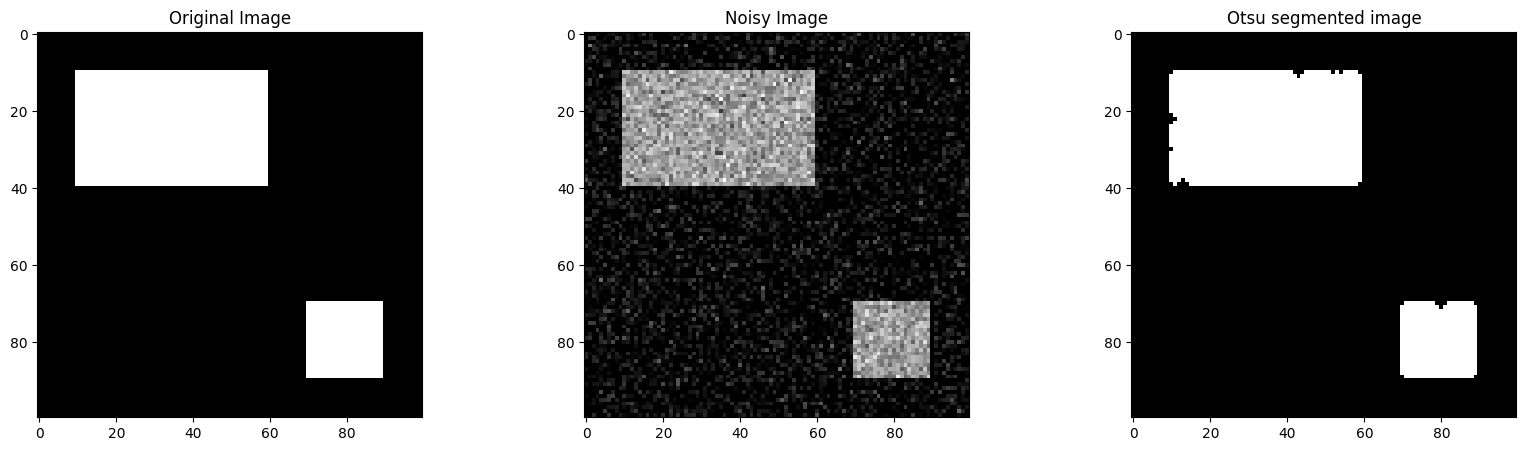

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, util, morphology
from PIL import Image

def draw_square(img, top_left, side_length, value):
    x_start, y_start = top_left
    x_end, y_end = x_start + side_length, y_start + side_length
    img[x_start:x_end, y_start:y_end] = value


def draw_rectangle(img, top_left, bottom_right, value):
    x_start, y_start = top_left
    x_end, y_end = bottom_right
    img[x_start:x_end, y_start:y_end] = value

image = np.zeros((100, 100), dtype=np.uint8)
draw_rectangle(image, top_left=(10, 10), bottom_right=(40, 60), value=127)
draw_square(image, top_left=(70, 70), side_length=20, value=127)


noisy_image = util.random_noise(image, mode='gaussian', var=0.01) * 255

threshold = filters.threshold_otsu(noisy_image)
binary_image = noisy_image > threshold
opened_image = morphology.opening(binary_image, morphology.disk(1))
cleaned_image = morphology.closing(opened_image, morphology.disk(1))

fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Increased figure size for better visibility
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title('Noisy Image')
axes[2].imshow(cleaned_image, cmap='gray')
axes[2].set_title('Otsu segmented image')
plt.show()

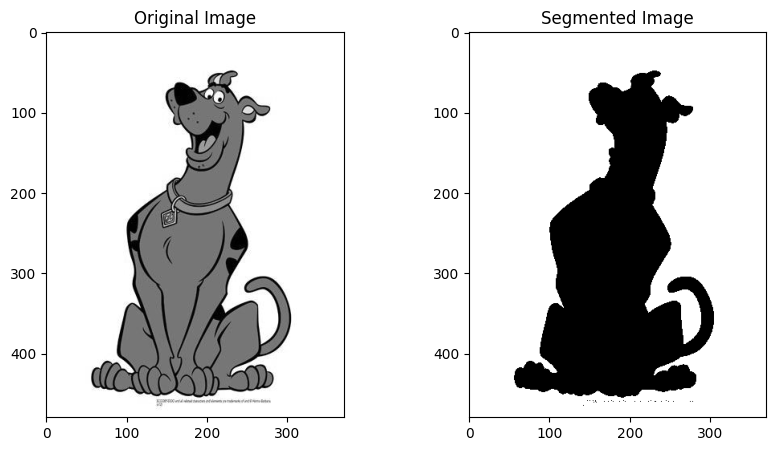

In [11]:
#Question2
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def region_growing(image, seeds, threshold):

    segmented_image = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)

    # Define neighborhood connectivity (8-connectivity)
    connectivity = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)]

    # Create a queue for BFS
    queue = deque(seeds)

    # Perform region growing
    while queue:
        x, y = queue.popleft()
        if visited[y, x]:
            continue

        # Mark pixel as visited
        visited[y, x] = True

        # Check if pixel value is within threshold range
        if abs(int(image[y, x]) - int(image[seeds[0][1], seeds[0][0]])) <= threshold:
            segmented_image[y, x] = 255

            # Add neighboring pixels to the queue
            for dx, dy in connectivity:
                nx, ny = x + dx, y + dy
                if 0 <= nx < image.shape[1] and 0 <= ny < image.shape[0] and not visited[ny, nx]:
                    queue.append((nx, ny))

    return segmented_image

# Read the image
image = cv2.imread('/content/5848f533a746a507303588b61a7e201b.jpg', cv2.IMREAD_GRAYSCALE)

# Define seed points inside the object of interest
seeds = [(350, 450)]

# Set threshold for region growing
threshold = 119

# Perform region growing segmentation
segmented_image = region_growing(image, seeds, threshold)


# Display results
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(segmented_image, cmap='gray'), plt.title('Segmented Image')
plt.show()
